Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Akshaj Kammari"
COLLABORATORS = "You.com"

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Akshaj Kammari<br>
<b>NetID</b>: ak1990<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:   ak  


# Lab 4: Multivariate Linear Regression

### Due Date: Wednesday November 29, 2023 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on test data 


## Initialize

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data (USA_Housing.csv). 

# Task 1 - Initialization
Read the file into a dataframe. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [4]:
import pandas as pd
df=pd.read_csv('/srv/shared/USA_Housing.csv', sep=',',header=None)   # do not download the data files as they may change
#df

df.columns = df.iloc[0]
df = df[1:]

df_adjusted = df.drop('Address', axis = 1) # Remove the address column
df_adjusted

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1,79545.45857,5.682861322,7.009188143,4.09,23086.8005,1059033.558
2,79248.64245,6.002899808,6.730821019,3.09,40173.07217,1505890.915
3,61287.06718,5.86588984,8.51272743,5.13,36882.1594,1058987.988
4,63345.24005,7.188236095,5.586728665,3.26,34310.24283,1260616.807
5,59982.19723,5.040554523,7.839387785,4.23,26354.10947,630943.4893
...,...,...,...,...,...,...
4996,60567.94414,7.830362444,6.137356228,3.46,22837.36103,1060193.786
4997,78491.27543,6.999134987,6.576762661,4.02,25616.11549,1482617.729
4998,63390.68689,7.250590615,4.80508098,2.13,33266.14549,1030729.583
4999,68001.33124,5.534388416,7.130143864,5.44,42625.62016,1198656.872


### Activity 1.2 Split Data into training and test data sets

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn
from sklearn.model_selection import train_test_split

df_training = df_adjusted.head(4500)
df_testing = df_adjusted.tail(500)                     # we will be using test data later in this assignment

print(df_training)
print(df_testing)

0    Avg. Area Income Avg. Area House Age Avg. Area Number of Rooms  \
1         79545.45857         5.682861322               7.009188143   
2         79248.64245         6.002899808               6.730821019   
3         61287.06718          5.86588984                8.51272743   
4         63345.24005         7.188236095               5.586728665   
5         59982.19723         5.040554523               7.839387785   
...               ...                 ...                       ...   
4496      71270.84203         5.425916412               7.691914339   
4497      59124.12488         6.420174477               8.016993185   
4498      55383.02378         7.098641928                  8.120948   
4499      52512.84234         7.371844252                6.21934521   
4500      77050.18056         6.286364384               5.948392094   

0    Avg. Area Number of Bedrooms Area Population        Price  
1                            4.09      23086.8005  1059033.558  
2                

### Activity 1.3 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [7]:
### BEGIN ANSWER
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled_values = [[], [], [], [], []]
X_scaled_values[0] = scaler.fit_transform(df_training[['Avg. Area Income']])
X_scaled_values[1] = scaler.fit_transform(df_training[['Avg. Area House Age']])
X_scaled_values[2] = scaler.fit_transform(df_training[['Avg. Area Number of Rooms']])
X_scaled_values[3] = scaler.fit_transform(df_training[['Avg. Area Number of Bedrooms']])
X_scaled_values[4] = scaler.fit_transform(df_training[['Area Population']])
Y_scaled_values = scaler.fit_transform(df_training[['Price']])


### END ANSWER


# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

### Activity 1.4 Plot the features of data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a good linear regression model. Some features may have more predictive power than others. In this activity, we will plot the points to see if a linear regression line fit to data is reasonable. Plot housing prices vs each of the other features.

#### Plot House Age vs Price

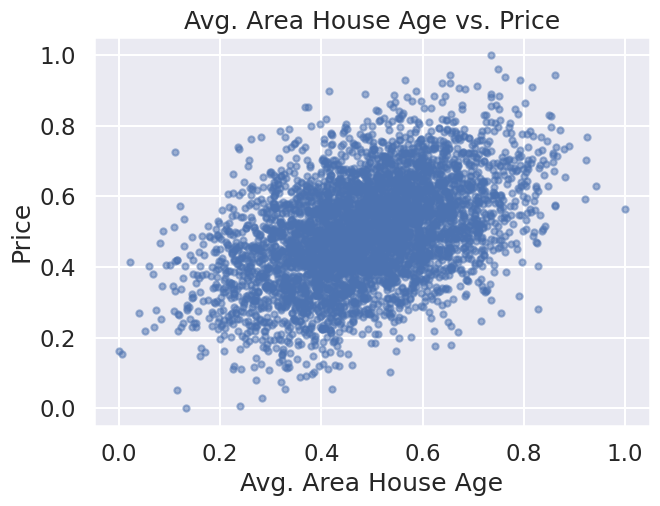

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN ANSWER

plt.title('Avg. Area House Age vs. Price')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.scatter(x[1], y, alpha = 0.5, s = 20)
plt.show()

### END ANSWER

#### Plot number of rooms vs Price

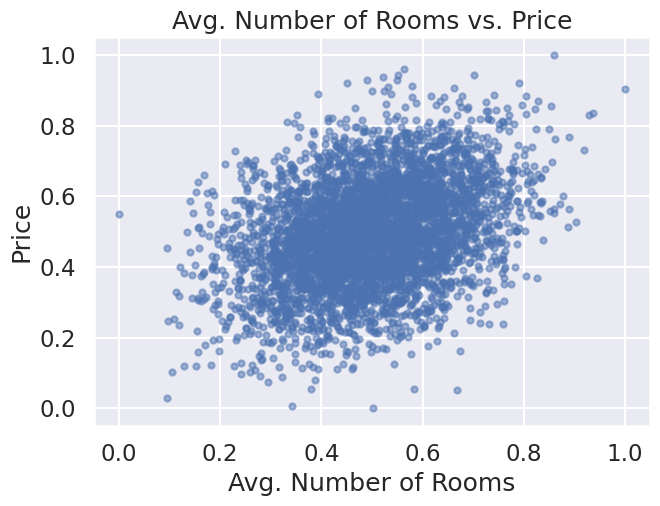

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN ANSWER

plt.title('Avg. Number of Rooms vs. Price')
plt.xlabel('Avg. Number of Rooms')
plt.ylabel('Price')
plt.scatter(x[2], y, alpha = 0.5, s = 20)
plt.show()

### END ANSWER

#### Plot income vs Price

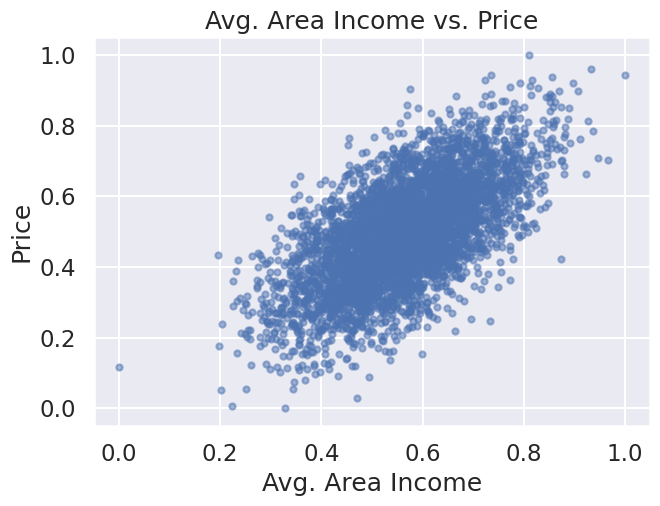

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area income" and y = price
### BEGIN ANSWER

plt.title('Avg. Area Income vs. Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.scatter(x[0], y, alpha = 0.5, s = 20)
plt.show()

### END ANSWER

#### Plot Bedrooms vs Price

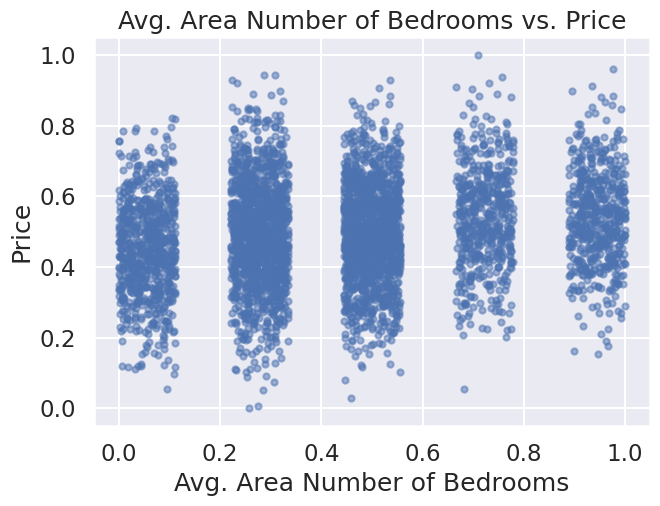

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Bedrooms" and y = price
### BEGIN ANSWER

plt.title('Avg. Area Number of Bedrooms vs. Price')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.scatter(x[3], y, alpha = 0.5, s = 20)
plt.show()

### END ANSWER

#### Plot Population vs Price

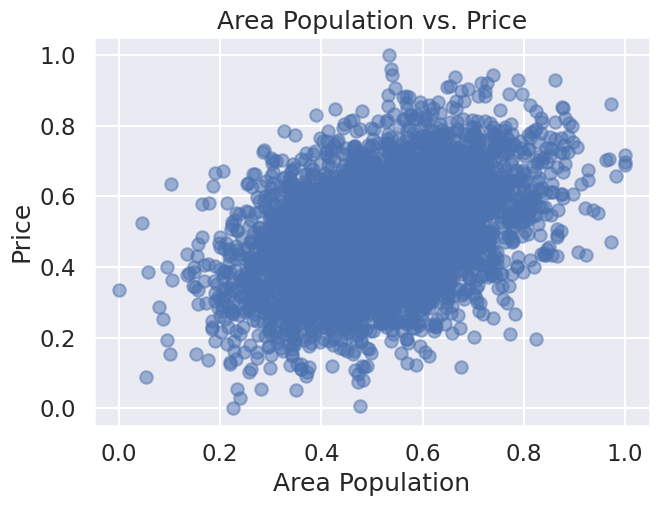

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "population" and y = price
### BEGIN ANSWER

plt.title('Area Population vs. Price')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.scatter(x[4], y, alpha = 0.5)
plt.show()

### END ANSWER

## Question 1.5
question: Based on what you see in the plots, what features are good to use in a linear regression model to predict housing prices? Jutify your answers

I don't think that linear regression should be used because the plots will lead to a decent amount of error.

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [13]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    x2 = np.array(x)
    return theta0 + theta1 * x2


### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. Use the function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [14]:
import numpy as np

## BEGIN ASNWER
def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: average L2 square error
    Assumptions: none
    """
    L = lambda a: a ** 2
    y2 = h(theta0, theta1, x)
    err = y - y2
    return float(sum(L(err)))
    
## END ANSWER

## testing
sqerror(x[0], y, 0.29,0.52)
sqerror(x[1], y, 0.29,0.52)

84.87387899519469

### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [15]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: average L1 error
    Assumptions: none
    """
    y2 = h(theta0, theta1, x)
    err = y - y2
    return float(sum(abs(err)))

## END ANSWER

## testing
abserror(x[0], y, 0.29,0.52)
abserror(x[1], y, 0.29,0.52)

494.63716856391824

### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 

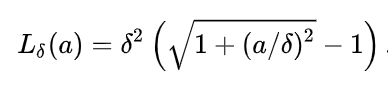

The following function finds the average huber error. In this equation, a  = |h(theta) - y| and delta is a value you can change (see notes for details)

In [16]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    y2 = h(theta0, theta1, x)
    err = y - y2
    return float(sum( delta**2 * (((1+(((abs(err) )/delta)**2)) ** (1/2)) - 1)))

## END ANSWER

## testing
huberror(x[0], y, 0.29,0.52,0.1)
huberror(x[1], y, 0.29,0.52,0.1)

26.116912130884877

### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [17]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [19]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y) 
    
    # compute the L2 error or sqerr for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error or abserr for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the huber error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)

    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));

#source: you.com

interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best/smallest values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [20]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = .3
theta1 = .4
error = 73.984657
# BEST VALUES FOR AVE ABS ERROR
theta0 = .3
theta1 = .4
error = 460.6187

# BEST VALUES FOR AVE HUBER ERROR
theta0 = .1
theta1 = .8
error = 4.2549

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. When implementing you need to simulataneously compute the values of theta0 and theta1. (do not use a changed theta0 value in computing theta1 in the same iteration.)

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [21]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    theta0, theta1, newError, iterations = 0, 0, 0, 0
    oldError = 10 * threshold
    
    while abs(oldError - newError) >= threshold:
        oldError = sqerror(obsX, obsY, theta0, theta1)
        iterations += 1
        sumTheta0 = 0
        sumTheta1 = 0
        
        for i in range(len(obsX)):
            sumTheta0 += theta1 * obsX[i] + theta0 - obsY[i]
            sumTheta1 += (theta1 * obsX[i] + theta0 - obsY[i]) * obsX[i]
        
        tempTheta0 = theta0 - alpha * sumTheta0
        tempTheta1 = theta1 - alpha * sumTheta1
        
        newError = sqerror(obsX, obsY, tempTheta0, tempTheta1)
        theta0, theta1 = tempTheta0, tempTheta1
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, newError = {newError}')
    
    return [theta0, theta1, newError, iterations]
    
    
# END ANSWER

[theta0,theta1,newError,iterations] = gd2(x[0],y,0.00025,0.0001)
print(iterations)

#source: you.com

iter_num = 1, theta0 = [0.55863566], theta1 = [0.32809293], newError = 344.12370767419077
iter_num = 2, theta0 = [0.28021832], theta1 = [0.17793111], newError = 138.90500617485296
iter_num = 3, theta0 = [0.41048715], theta1 = [0.26111478], newError = 89.65234482401647
iter_num = 4, theta0 = [0.34131881], theta1 = [0.23026921], newError = 77.57505851547543
iter_num = 5, theta0 = [0.36957519], theta1 = [0.25497096], newError = 74.36487984550948
iter_num = 6, theta0 = [0.35033879], theta1 = [0.25244061], newError = 73.27569393405251
iter_num = 7, theta0 = [0.35435203], theta1 = [0.26308934], newError = 72.69969734568622
iter_num = 8, theta0 = [0.34708036], theta1 = [0.26719131], newError = 72.2535617287189
iter_num = 9, theta0 = [0.34538146], theta1 = [0.27437728], newError = 71.8457581801501
iter_num = 10, theta0 = [0.34102527], theta1 = [0.27994724], newError = 71.45429855277635
iter_num = 11, theta0 = [0.33802865], theta1 = [0.28619689], newError = 71.07377063264535
iter_num = 12, thet

KeyboardInterrupt: 

In [22]:
# observe theta0 and theta1
theta0, theta1

(0.1, 0.8)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [23]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN ANSWER

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    theta0, theta1, newError, iterations = 0, 0, 0, 0
    oldError = 10 * threshold
    
    while abs(oldError - newError) >= threshold:
        oldError = huberror(obsX, obsY, theta0, theta1, delta)
        iterations += 1
        sumTheta0, sumTheta1 = 0, 0
        
        for i in range(len(obsX)):
            a = theta1 * obsX[i] + theta0 - obsY[i]
            sumTheta0 += (delta * a)/(1 + (a/delta) ** 2) ** 0.5
            sumTheta1 += (delta * a * obsX[i])/(1 + (a/delta) ** 2) ** 0.5
        
        tempTheta0 = theta0 - alpha * sumTheta0
        tempTheta1 = theta1 - alpha * sumTheta1
        
        newError = huberror(obsX, obsY, tempTheta0, tempTheta1, delta)
        theta0, theta1 = tempTheta0, tempTheta1
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, newError = {newError}')
    
    return [theta0, theta1, newError, iterations]
    
## END ANSWER

# testing    
[theta0,theta1,newError,iterations] = gdh(x[0],y,0.01,0.000001,0.01)
print(iterations)

#source: you.com

iter_num = 1, theta0 = [0.00449709], theta1 = [0.00254189], newError = 21.633842126439948
iter_num = 2, theta0 = [0.00899321], theta1 = [0.00508349], newError = 21.367117481185762
iter_num = 3, theta0 = [0.01348847], theta1 = [0.00762485], newError = 21.1004755937764
iter_num = 4, theta0 = [0.01798313], theta1 = [0.01016602], newError = 20.833894371169645
iter_num = 5, theta0 = [0.02247726], theta1 = [0.012707], newError = 20.56737387650713
iter_num = 6, theta0 = [0.02697072], theta1 = [0.01524769], newError = 20.3009325567615
iter_num = 7, theta0 = [0.03146343], theta1 = [0.01778806], newError = 20.034570106866614
iter_num = 8, theta0 = [0.03595557], theta1 = [0.02032819], newError = 19.76826847802087
iter_num = 9, theta0 = [0.04044717], theta1 = [0.02286814], newError = 19.502029414281424
iter_num = 10, theta0 = [0.04493799], theta1 = [0.02540784], newError = 19.235885761368806
iter_num = 11, theta0 = [0.04942748], theta1 = [0.02794714], newError = 18.969895936044512
iter_num = 12, t

KeyboardInterrupt: 

### Activity 3.2
1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent
2. Experiment the new values of theta0, theta1 to see if the interactive widget shows similar things.

### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x,y)
print(result.intercept_)
print(result.coef_)

In [ ]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(theta0,theta1)

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here */
$$ \theta_1 = \theta_1 - \alpha*(\sum(\theta_2*x_2^j+ \theta_1*x_1^j + \theta_0 - y^j) * x_1^j $$
$$ \theta_2 = \theta_2 - \alpha*(\sum(\theta_2*x_2^j+ \theta_1*x_1^j + \theta_0 - y^j) * x_2^j $$

## Activity 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [26]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER
def gd22(obsX0, obsX1, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0, theta1, theta2 = 0, 0, 0
    newError1, newError2, newError, iterations = 0, 0, 0, 0
    oldError0, oldError1, oldError = 10 * threshold, 10 * threshold, 10 * threshold
    
    while abs(oldError-newError) >= threshold:
        oldError0 = sqerror(obsX0, obsY, theta0, theta1)
        oldError1 = sqerror(obsX1, obsY, theta0, theta1)
        oldError = oldError0 + oldError1
        iterations += 1
        sumTheta0, sumTheta1, sumTheta2 = 0, 0, 0
        
        for i in range(len(obsX1)):
            sumTheta0 += theta2 * obsX1[i] + theta1*obsX0[i] + theta0-obsY[i]
            sumTheta1 += (theta2 * obsX1[i] + theta1*obsX0[i] + theta0 - obsY[i]) * obsX0[i]
            sumTheta2 += (theta2 * obsX1[i] + theta1*obsX0[i] + theta0 - obsY[i]) * obsX1[i]
        
        tempTheta0 = theta0 - alpha * sumTheta0
        tempTheta1 = theta1 - alpha * sumTheta1
        tempTheta2 = theta2 - alpha * sumTheta2
        
        newError1 = sqerror(obsX0, obsY, tempTheta0, tempTheta1)
        newError2 = sqerror(obsX1, obsY, tempTheta0, tempTheta2)
        newError = newError1 + newError2
        
        theta0, theta1, theta2 = tempTheta0, tempTheta1, tempTheta2
        print(f'iter_num = {iterations}, theta0 = {theta0}, theta1 = {theta1}, theta2 = {theta2}, newError = {newError}')
    
    return [theta0, theta1, theta2, newError, iterations]
    
    
    
# END ANSWER

[theta0,theta1,theta2, newError,iterations] = gd22(x[0],x[1],y,0.00025655,0.001)
print(iterations)

#source: you.com

iter_num = 1, theta0 = [0.57327191], theta1 = [0.33668896], theta2 = [0.28895607], newError = 677.9820163285584
iter_num = 2, theta0 = [0.10322768], theta1 = [0.07834666], theta2 = [0.06493274], newError = 1313.387597800343
iter_num = 3, theta0 = [0.46984631], theta1 = [0.29698705], theta2 = [0.25209894], newError = 279.87771083146754
iter_num = 4, theta0 = [0.16574796], theta1 = [0.13306401], theta2 = [0.10945266], newError = 809.3016372926843
iter_num = 5, theta0 = [0.39955711], theta1 = [0.27576766], theta2 = [0.23113575], newError = 167.92460049118438
iter_num = 6, theta0 = [0.20218997], theta1 = [0.17250227], theta2 = [0.14076378], newError = 567.5934846317721
iter_num = 7, theta0 = [0.35066212], theta1 = [0.26634333], theta2 = [0.22030656], newError = 159.34013612986638
iter_num = 8, theta0 = [0.22195638], theta1 = [0.20203127], theta2 = [0.16350039], newError = 447.07810899959134
iter_num = 9, theta0 = [0.31561011], theta1 = [0.26441628], theta2 = [0.21591122], newError = 183.32

KeyboardInterrupt: 

Write the values of thetas obtained from function above.
$$\theta_0 = 0.57327191$$ 
$$\theta_1 = 0.33668896$$ 
$$\theta_2 = 0.28895607$$ 
and write the model 
$$
y = 0.28895607*x_2 + 0.33668896*x_1 + 0.57327191
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [27]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume
y = df_training.Price
X = df_training[["Avg. Area House Age","Avg. Area Number of Rooms"]]

model = LinearRegression().fit(X, y)
model
print(model.coef_)
model.intercept_

[160858.15712254 120286.83437599]


-568410.3310406173

What coefficients do you get? Are they close to what you received from gradient descent? ]Is that error smaller or bigger than the squared error you received?

##### Begin Answer
The coefficients I got were close to what I received from gradient descent, but the error is smaller than the squared error that i received.

##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [28]:
## Begin ANSWER
scaler = MinMaxScaler()
xTest = [[],[]]
xTest[0] = scaler.fit_transform(df_testing[["Avg. Area House Age"]])
xTest[1] = scaler.fit_transform(df_testing[["Avg. Area Number of Rooms"]])
yTest = scaler.fit_transform(df_testing[["Price"]])

## End ANSWER
error_gd = 1/500*89.82
error_gd

0.17964

## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [29]:
## Begin ANSWER
model3 = LinearRegression().fit(xTest[0], yTest)
print(model3.coef_, model3.intercept_)

model4 = LinearRegression().fit(xTest[1], yTest)
print(model4.coef_, model4.intercept_)

sumError = 0
for i in range(len(xTest[1])):
    sumError += abs(yTest[i] - (0.27060168 * xTest[1][i] + 0.53716345 * xTest[0][i] + 0.60149699))

## End ANSWER
error_lib = 1/500*sumError
error_lib

#source: you.com

[[0.53716345]] [0.22797102]
[[0.27060168]] [0.37352597]


array([0.50548824])

## Activity 4.4.3
Compare the performance of Gradient Descent and Library Estimators. Briefly explain your observations and if there are significant descrepancies, explain them in your own words. Do you think either model would be a reasonable model for predicting home prices for new homes on the market? Why or Why not.

I would say that using the gradient descent library would be the better choice out of the two because the library error is greater, but regardless I wouldn't think either would be reasonable due to the high errors.

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-lowest, 10-highest) : 7
* how can we improve his lab? : 

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab5.jpynb<br>
<b> Submit To: </b> codebench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

@2023 All Rights Reserved. Lab Developed by A.D. Gunawardena for CS 439. DO NOT post a copy of this lab or solutions in public space such as github or on commercial sites. 